<a href="https://colab.research.google.com/github/dinomark/data-science-basic/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%ED%9A%8C%EA%B7%80_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [5]:
#boston 데이터 세트 로드
boston=load_boston()
#boston 데이터 세트 dataframe 변환
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)
#boston 데이터 세트의 target 배열은 주택 가격임. 이를 price 칼럼으로 dataframe에 추가함
bostonDF['price']=boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


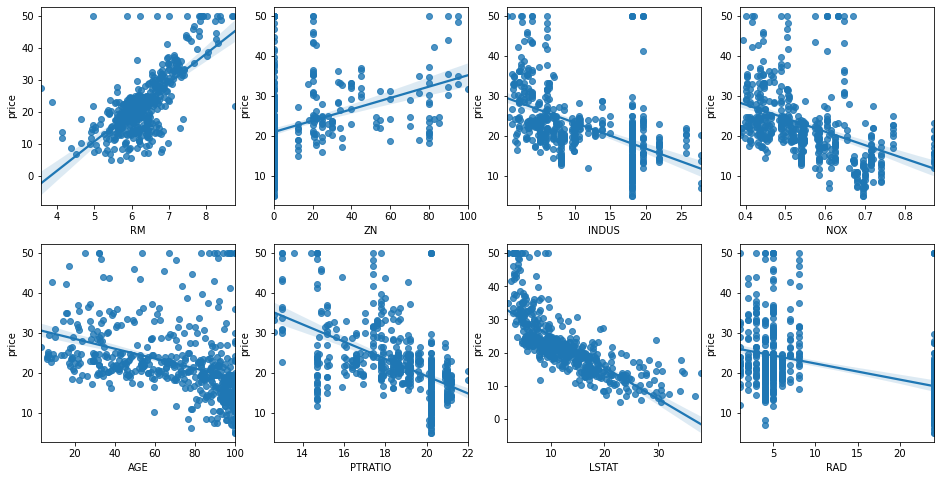

In [8]:
fig, axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  #시본의 regplot을 이용해 산점도와 선형회귀 직선을 함께 표현
  sns.regplot(x=feature,y='price',data=bostonDF,ax=axs[row][col])
#INDUS,NOX,AGE,PTARTIO=하향 회귀곡선, LSTAT 가장 큰 하향 곡선

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target=bostonDF['price']
x_data=bostonDF.drop(['price'],axis=1,inplace=False)

x_train,x_test,y_train,y_test=train_test_split(x_data,y_target,test_size=0.3,random_state=156)
#선형회귀 OLS로 학습/예측/평가 수행.
lr=LinearRegression()
lr.fit(x_train,y_train)
y_preds=lr.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE:{0:.3f},RMSE:{1:.3F}'.format(mse,rmse))
print('Varience score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297,RMSE:4.159
Varience score: 0.757


In [12]:
print('절편값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1),index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score
y_target=bostonDF['price']
x_data=bostonDF.drop(['price'],axis=1,inplace=False)
lr=LinearRegression()
#cross_val_score()로 5폴드 세트로 MSE를 구한뒤 이를 기반으로 다시 RMSE구함
neg_mse_scores=cross_val_score(lr,x_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5folds의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5folds의 평균 RMSE:5.829
